## Feature Engineering

- process of selecting, manipulating and transforming raw data into features that can be used in supervised learning

1. Dimensionality Reduction
    - Feature selection 
        - choose features based on feature rankings/importance
        - use own knowledge of dataset, or choose randomly 
2. Scaling 
    - process of transforming the values of the features of a dataset till they are within a specific range
    - ensure that no single feature dominates the distance calculations in an algorithm
3. Transform
    - transform raw data's properties to create new data 
    - ex) have a dataset of weather on the day -> add features like "is a holiday" to create new dataset
4. Binning
    - process of organizing your data into a finite range of intervals
    - ex) 32 years old, 42 years old -> 30's, 40's 
5. Dummy 
    - Dummy variables are numerical variables that represent the actual data
    - one-hot encoding 

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("./data/Fish.csv")

In [22]:
df = df[df["Species"] == "Perch"][["Weight", "Length2", "Height"]]

In [23]:
df.head()

,Weight,Length2,Height
72,5.9,8.4,2.1120
73,32.0,13.7,3.5280
74,40.0,15.0,3.8240
75,51.5,16.2,4.5924
76,70.0,17.4,4.5880


In [24]:
x = df.drop("Weight", axis=1)
y = df["Weight"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [25]:
x_train.shape

(42, 2)

#### PolynomialFeatures

In [26]:
pf  = PolynomialFeatures()
pf.fit_transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

In [27]:
pf.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

- include_bias: 
    - If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [28]:
pf = PolynomialFeatures(include_bias=False)
pf.fit_transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [29]:
pf = PolynomialFeatures(include_bias=False)
poly_train = pf.fit_transform(x_train)
poly_test = pf.transform(x_test)

In [30]:
poly_train.shape

(42, 5)

In [31]:
lr_org = LinearRegression()
lr_org.fit(x_train, y_train)
lr_org.score(x_test, y_test)

0.9558802889185392

In [32]:
lr_org.score(x_train, y_train)

0.9197271709550665

- score on training set is less than score on test set -> underfitting may be an issue

In [34]:
lr_poly = LinearRegression()
lr_poly.fit(poly_train, y_train)
lr_poly.score(poly_test, y_test)

0.9804133647673002

In [35]:
lr_poly.score(poly_train, y_train)

0.9875194882986965

### model optimization
- add more features
    - degree parameters 

In [37]:
pf = PolynomialFeatures(degree=5, include_bias=False)
poly_train5 = pf.fit_transform(x_train)
poly_test5 = pf.transform(x_test)
poly_train5.shape

(42, 20)

In [39]:
lr_poly5 = LinearRegression()
lr_poly5.fit(poly_train5, y_train)
lr_poly5.score(poly_test5, y_test)

-1.4999695005458014

In [40]:
lr_poly5.score(poly_train5, y_train)

0.9910390813488803

we now have a problem of overfitting
- model gives accurate predictions for training data but not for new data

# Regularization 
- set of methods for reducing overfitting in machine learning models
- in linear regression, prevent the slopes from becoming to extreme

- Ridge regression is a type of regularized regression model.
    - adds an L2 regularization term to the linear equation
    - works by adding a penalty term to the cost function of a linear regression model, called the regularization term. This regularization term prevents the model from overfitting by penalizing the large coefficients.

- Lasso regression 
    - L1 Regularization 
    - L1 regularization adds the absolute value of the coefficient as a penalty term
    - The main aim of Lasso Regression is to reduce the features and hence can be used for Feature Selection.

In [41]:
ss = StandardScaler()
scaled_train = ss.fit_transform(poly_train5)
scaled_test = ss.transform(poly_test5)

### Ridge Regression

In [42]:
rid = Ridge()
rid.fit(scaled_train, y_train)
rid.score(scaled_test, y_test)

0.975179359064749

In [43]:
rid.score(scaled_train, y_train)

0.9869169788022066

## Hyperparameter
- Hyperparameters are external configuration variables that data scientists use to manage machine learning model training
- machine doesn't learn, rather the human must select the parameters

## Ridge Model Hyperparameter tuning
- alpha: regularization coefficient 
- if alpha is large, regularization may make model underfit the data 
    - reduces the # of parameters 


In [44]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # create new ridge object
    rid = Ridge(alpha = alpha)
    #train the model 
    rid.fit(scaled_train, y_train)
    # save the model performance 
    train_hist.append(rid.score(scaled_train, y_train))
    test_hist.append(rid.score(scaled_test, y_test))


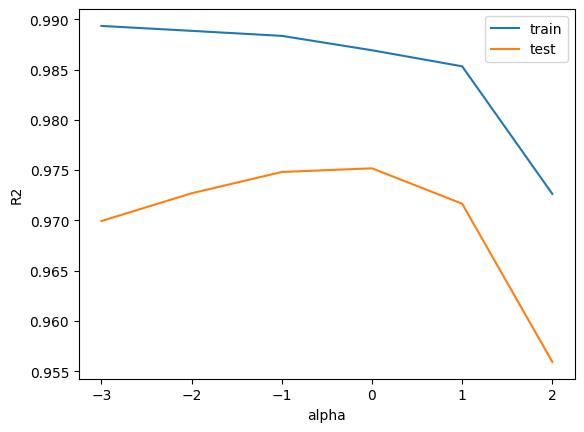

In [46]:
plt.figure()
#difference between the alpha values are very large so we should change the alpha values to log function 
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)

plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels=["train", "test"])
plt.show()

In [47]:
test_hist

[0.96993713276807,
 0.9726967207573958,
 0.9748140263338774,
 0.975179359064749,
 0.9716610875666908,
 0.9559293067370022]

- as alpha gets large, the score on training set becomes low 
    -> underfitting 

alpha value that gives best score on test data is 1 

In [49]:
rid = Ridge(alpha=1)
rid.fit(scaled_train, y_train)
print(rid.score(scaled_train, y_train))
print(rid.score(scaled_test, y_test))

0.9869169788022066
0.975179359064749


## Lasso Regression

In [50]:
las = Lasso()
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9874023585546342
0.9765143278478134


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.312e+02, tolerance: 4.185e+02
  model = cd_fast.enet_coordinate_descent(


## Hyperparameter tuning for Lasso model

In [51]:
train_hist = []
test_hist = []

alpha_li = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_li:
    # create new Lasso object
    las = Lasso(alpha = alpha)
    #train the model 
    las.fit(scaled_train, y_train)
    # save the model performance 
    train_hist.append(las.score(scaled_train, y_train))
    test_hist.append(las.score(scaled_test, y_test))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.312e+04, tolerance: 4.185e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+04, tolerance: 4.185e+02
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

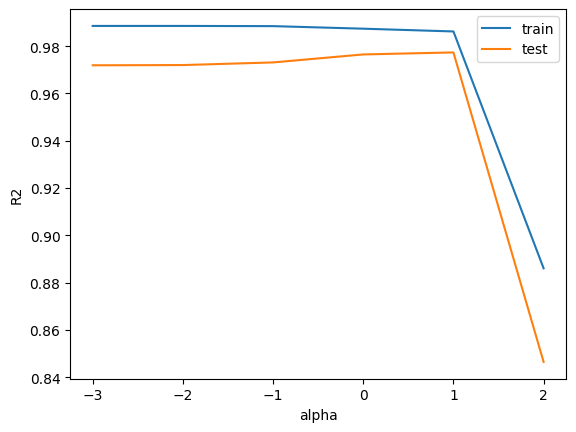

In [52]:
plt.figure()
#difference between the alpha values are very large so we should change the alpha values to log function 
plt.plot(np.log10(alpha_li), train_hist)
plt.plot(np.log10(alpha_li), test_hist)

plt.xlabel("alpha")
plt.ylabel("R2")
plt.legend(labels=["train", "test"])
plt.show()

In [53]:
# check where model performance is highest 
las = Lasso(alpha = 10)
las.fit(scaled_train, y_train)
print(las.score(scaled_train, y_train))
print(las.score(scaled_test, y_test))

0.9862345199273408
0.9773664550904042


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.964e+02, tolerance: 4.185e+02
  model = cd_fast.enet_coordinate_descent(


In [54]:
las.coef_

array([ 0.        ,  0.        , 70.44044689,  0.        ,  0.        ,
        0.        , 39.59619285, 68.37731261, 76.11168126,  0.        ,
        0.        ,  0.        ,  0.        , 50.56704019,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [55]:
print(np.sum(las.coef_ == 0))

15


- lasso model has tendency to make slope 0